In [61]:
import time
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize
from pandas_datareader import data as wb
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# CREE is being used for grow lights. After full legalization re-evaluate.
tickers = ['ABBV', 'SMG', 'CRBP', 'GWPH', 'INSY', 'VRX', 'CREE']
mjinvestments = pd.DataFrame()

In [40]:
for t in tickers:
    mjinvestments[t] = wb.DataReader(t, data_source='yahoo', start='2015-01-01')['Adj Close']
    print(t)
    time.sleep(5)

ABBV
SMG
CRBP
GWPH
INSY
VRX
CREE


In [42]:
mjnorm = (mjinvestments/mjinvestments.iloc[0])*100

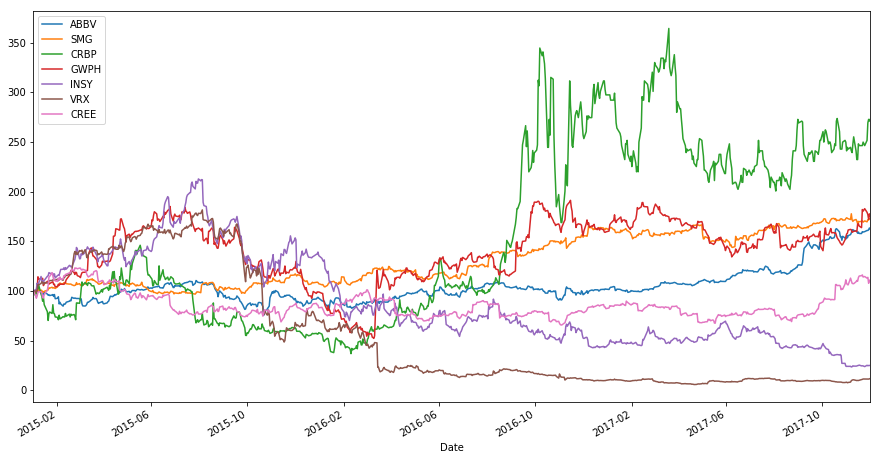

In [45]:
mjnorm.plot(figsize=(15,8));

In [52]:
returns = (mjinvestments/mjinvestments.shift(1))-1

In [58]:
returns.head()

,ABBV,SMG,CRBP,GWPH,INSY,VRX,CREE
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018819,-0.026214,-0.045775,0.007710,0.012562,-0.001108,-0.043655
2015-01-06,-0.004950,0.009472,0.033210,-0.013743,0.007491,-0.010118,-0.029997
2015-01-07,0.040417,0.018272,0.035714,0.020830,0.057621,0.016033,0.023193
2015-01-08,0.010459,0.025703,0.000000,0.127357,-0.023067,0.061880,0.039750


In [59]:
mjinvestments.pct_change(1).head()

,ABBV,SMG,CRBP,GWPH,INSY,VRX,CREE
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018819,-0.026214,-0.045775,0.007710,0.012562,-0.001108,-0.043655
2015-01-06,-0.004950,0.009472,0.033210,-0.013743,0.007491,-0.010118,-0.029997
2015-01-07,0.040417,0.018272,0.035714,0.020830,0.057621,0.016033,0.023193
2015-01-08,0.010459,0.025703,0.000000,0.127357,-0.023067,0.061880,0.039750


In [60]:
returns.mean()

ABBV    0.000800
SMG     0.000824
CRBP    0.002850
GWPH    0.001745
INSY   -0.001086
VRX    -0.001552
CREE    0.000434
dtype: float64

In [62]:
# Correlation pearsons-r
mjinvestments.pct_change(1).corr()

,ABBV,SMG,CRBP,GWPH,INSY,VRX,CREE
ABBV,1.000000,0.127533,0.084139,0.118834,0.305574,0.235420,0.154809
SMG,0.127533,1.000000,0.104135,0.108945,0.109215,0.076167,0.204782
CRBP,0.084139,0.104135,1.000000,0.085550,0.104792,0.048727,0.021650
GWPH,0.118834,0.108945,0.085550,1.000000,0.261839,0.116276,0.055593
INSY,0.305574,0.109215,0.104792,0.261839,1.000000,0.295140,0.124765
VRX,0.235420,0.076167,0.048727,0.116276,0.295140,1.000000,0.072851
CREE,0.154809,0.204782,0.021650,0.055593,0.124765,0.072851,1.000000


In [63]:
log_ret = np.log(mjinvestments/mjinvestments.shift(1))
log_ret.head()

,ABBV,SMG,CRBP,GWPH,INSY,VRX,CREE
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018999,-0.026563,-0.046855,0.007680,0.012484,-0.001108,-0.044636
2015-01-06,-0.004962,0.009427,0.032671,-0.013839,0.007463,-0.010170,-0.030456
2015-01-07,0.039621,0.018107,0.035091,0.020616,0.056022,0.015906,0.022928
2015-01-08,0.010404,0.025378,0.000000,0.119876,-0.023337,0.060041,0.038981


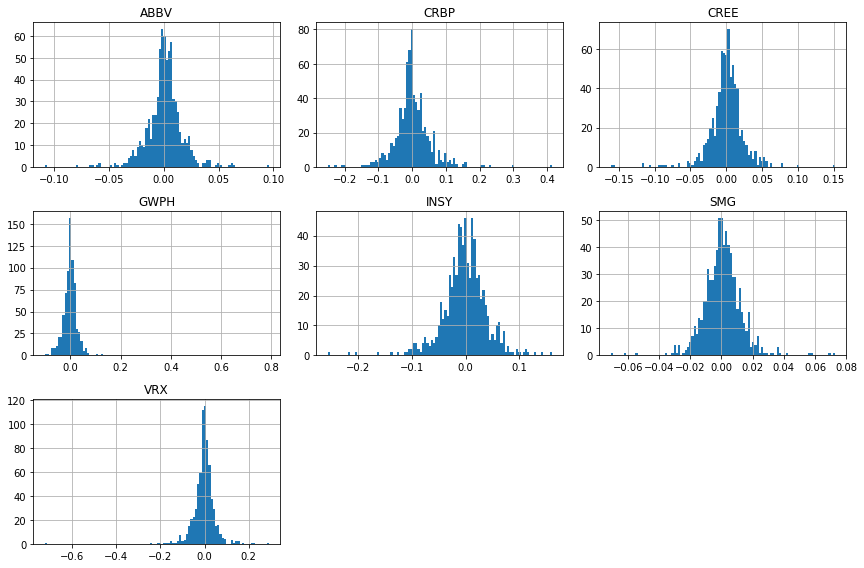

In [64]:
log_ret.hist(bins=100,figsize=(12,8));
plt.tight_layout();

In [65]:
log_ret.mean()

ABBV    0.000661
SMG     0.000748
CRBP    0.001366
GWPH    0.000766
INSY   -0.001892
VRX    -0.002891
CREE    0.000144
dtype: float64

In [69]:
log_ret.cov()

,ABBV,SMG,CRBP,GWPH,INSY,VRX,CREE
ABBV,0.000279,0.000026,0.000080,0.000113,0.000206,0.000206,0.000060
SMG,0.000026,0.000152,0.000069,0.000071,0.000052,0.000049,0.000060
CRBP,0.000080,0.000069,0.002916,0.000261,0.000220,0.000137,0.000025
GWPH,0.000113,0.000071,0.000261,0.001678,0.000489,0.000338,0.000081
INSY,0.000206,0.000052,0.000220,0.000489,0.001628,0.000603,0.000120
VRX,0.000206,0.000049,0.000137,0.000338,0.000603,0.002817,0.000090
CREE,0.000060,0.000060,0.000025,0.000081,0.000120,0.000090,0.000583


In [70]:
log_ret.cov() * 252 #252 busines days

,ABBV,SMG,CRBP,GWPH,INSY,VRX,CREE
ABBV,0.070390,0.006594,0.020136,0.028561,0.051987,0.051994,0.015187
SMG,0.006594,0.038258,0.017335,0.018003,0.013068,0.012384,0.015219
CRBP,0.020136,0.017335,0.734802,0.065830,0.055444,0.034596,0.006389
GWPH,0.028561,0.018003,0.065830,0.422966,0.123246,0.085228,0.020332
INSY,0.051987,0.013068,0.055444,0.123246,0.410294,0.151847,0.030176
VRX,0.051994,0.012384,0.034596,0.085228,0.151847,0.709940,0.022797
CREE,0.015187,0.015219,0.006389,0.020332,0.030176,0.022797,0.146918


In [77]:
np.random.seed(101)
print(mjinvestments.columns)
weights = np.array(np.random.random(len(mjinvestments.columns))) # needs to match number of stocks
print("Random Weights: " + str(weights))
weights = weights/np.sum(weights)
print("Rebalanced Weights: " + str(weights))

# Expeceted Return
expected_ret = np.sum((log_ret.mean() * weights) * 252) # 252 Business days in a year
print("Expected Portfolio Return: " + str(expected_ret))

# Expected Volatility 
expected_volatility = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
print("Expected Volatility: " + str(expected_volatility))

# Sharpe Ratio
SR = expected_ret/expected_volatility
print("Sharpe Ratio: " + str(SR))

Index(['ABBV', 'SMG', 'CRBP', 'GWPH', 'INSY', 'VRX', 'CREE'], dtype='object')
Random Weights: [ 0.51639863  0.57066759  0.02847423  0.17152166  0.68527698  0.83389686
  0.30696622]
Rebalanced Weights: [ 0.16587379  0.18330566  0.00914628  0.05509493  0.22011965  0.26785824
  0.09860144]
Expected Portfolio Return: -0.22059644124899933
Expected Volatility: 0.341422308414
Sharpe Ratio: -0.64611021545


In [79]:
np.random.seed(101)
num_portfolios = 25000
all_weights = np.zeros((num_portfolios, len(mjinvestments.columns)))
return_array = np.zeros(num_portfolios)
volatility_array = np.zeros(num_portfolios)
sharpe_array = np.zeros(num_portfolios)

for index in range(num_portfolios):
    # Weights 
    weights = np.array(np.random.random(len(mjinvestments.columns)))
    weights = weights/np.sum(weights)
    all_weights[index,:] = weights
    
    # Expeceted Return
    return_array[index] = np.sum((log_ret.mean() * weights) * 252) # 252 Business days in a year
    # Expected Volatility 
    volatility_array[index] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    # Sharpe Ratio
    sharpe_array[index] = return_array[index]/volatility_array[index]

In [80]:
sharpe_array.max()

0.83653598763480919

In [81]:
sharpe_array.argmax()

11157

In [82]:
all_weights[sharpe_array.argmax(),:]

array([ 0.4047907 ,  0.35212126,  0.08019722,  0.08793114,  0.02882089,
        0.00651652,  0.03962227])

In [83]:
max_sr_ret = return_array[sharpe_array.argmax()]
max_sr_vol = volatility_array[sharpe_array.argmax()]

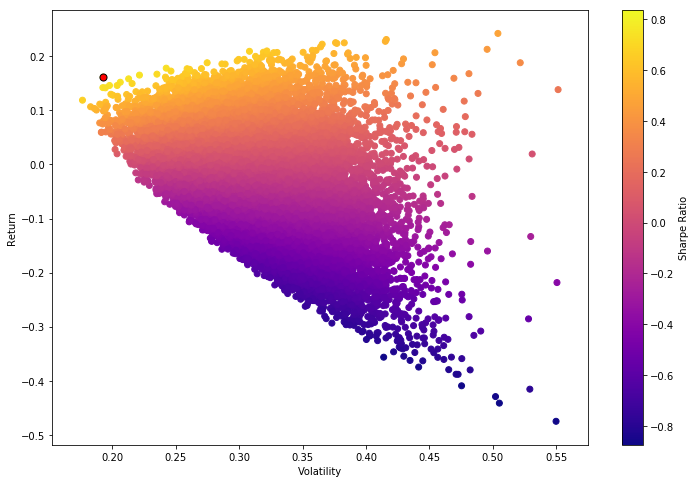

In [84]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, return_array, c=sharpe_array, cmap='plasma')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Volatility')
plt.ylabel('Return');
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolor='black');

In [85]:
weights

array([ 0.15051352,  0.13160497,  0.10647181,  0.16813609,  0.13933443,
        0.1777027 ,  0.12623648])

In [121]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum((log_ret.mean() * weights) * 252)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return(np.array([ret,vol,sr]))

In [122]:
def neg_sharpe(weights):
    return(get_ret_vol_sr(weights)[2] * -1)

In [123]:
def check_sum(weights):
    # return 0 if the sum of the wieghts is 1
    return(np.sum(weights) -1)

In [124]:
cons = ({'type':'eq', 'fun':check_sum})

In [126]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

In [127]:
init_guess = [0.1428,0.1428,0.1428,0.1428,0.1428,0.1428,0.1428]

In [128]:
get_ret_vol_sr(weights)

array([-0.07237321,  0.30467181, -0.23754481])

In [129]:
neg_sharpe(weights)

0.23754480737847178

In [130]:
check_sum(weights)

0.0

In [132]:
# minimize func from scipy
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [133]:
opt_results

     fun: -1.1233382489839259
     jac: array([  4.83870506e-04,  -4.75794077e-05,  -2.23103166e-03,
         7.10636377e-05,   3.90080684e+00,   5.31488843e+00,
         3.71090725e-01])
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([  2.74413301e-01,   6.65215569e-01,   4.57934906e-02,
         1.45776401e-02,   0.00000000e+00,   0.00000000e+00,
         1.12540186e-15])

In [134]:
opt_results.x

array([  2.74413301e-01,   6.65215569e-01,   4.57934906e-02,
         1.45776401e-02,   0.00000000e+00,   0.00000000e+00,
         1.12540186e-15])

In [135]:
get_ret_vol_sr(opt_results.x)

array([ 0.1896273 ,  0.16880695,  1.12333825])

In [136]:
# Efficient Frontier 
frontier_y = np.linspace(0,0.3,100) # see scatter bullet above: 0.3 is the max

In [137]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [138]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},{'type':'eq', 'fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    results = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds, constraints=cons)
    frontier_volatility.append(results['fun'])

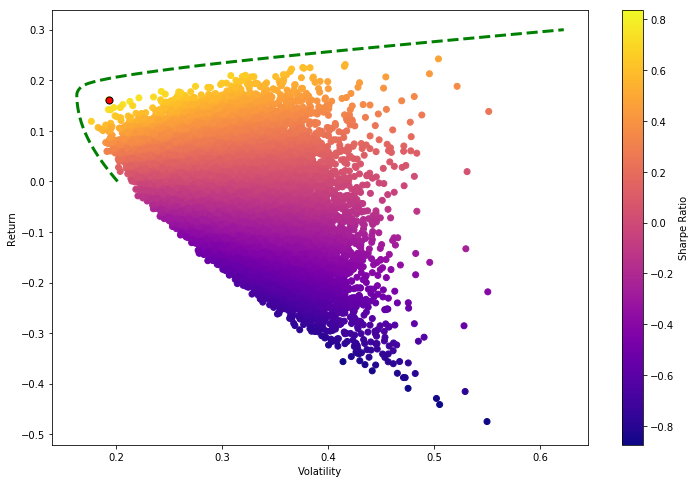

In [139]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, return_array, c=sharpe_array, cmap='plasma')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Volatility')
plt.ylabel('Return');
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolor='black');
plt.plot(frontier_volatility,frontier_y,"g--",linewidth=3);